# Data Analysis with Pandas | 5000 Youtube Channels
## Introducción

Podemos encontrar la URL de nuestro dataset en: 

https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade

Este dataset describe 5000 de los mejores valorados canales de la plataforma Youtube. 

## Importamos librerías

In [1]:
# import funciones
from funciones import grade

# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import seaborn as sns

In [2]:
%matplotlib inline
# %matplotlib notebook

# 1. Acquisition
Los datos adquiridos vienen del CSV que describe los 5000 canales de youtube mejor valorados. 

In [3]:
# Captura de datos
df_yt = pd.read_csv('data_youtube.csv')

In [4]:
df_yt.head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


### Conclusiones preliminares: 
1. Podemos ver que la columna **Rank** no aporta información ya que su orden es el de index del dataframe. 
2. **Grade** es una columna de datos categóricos que podemos traducir a valores numéricos con **A++** como máximo y **E--** como mínimo en una nueva columna que llamaremos **Numeric Grade**. 
3. **Video Upload, Subscribers y Video views** son 3 columnas que junto con la nueva **Numeric Grade** podremos calcular la correlación. 

### Hipótesis: 
Cuanto mejor valorado esté un canal, más subscriptores tendrá. 

# 2. Wrangling
Preparamos los datos para ser analizados

In [5]:
# Analizamos los datos estadísticos de nuestro dataframe
df_yt.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


### Columnas numéricas. 
Podemos ver que sólo la columna **Video views** se considera que tiene valores numéricos. 

In [6]:
# Analizamos los tipos
df_yt.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

Se puede apreciar que 'Video Uploads' y 'Subscribers' no son de tipo numérico por lo que deberemos transformarlos. 

In [7]:
# convertimos datos numéricos a tipo numérico

df_yt['Subscribers'] = pd.to_numeric(df_yt['Subscribers'], downcast='unsigned', errors='coerce')
df_yt['Video Uploads'] = pd.to_numeric(df_yt['Video Uploads'], downcast='unsigned', errors='coerce')

/home/alberto/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Volvemos a analizar los tipos y ya vemos que hemos conseguido que las columnas que deberían ser numéricas ya lo son. 

In [8]:
df_yt.dtypes

Rank              object
Grade             object
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views        int64
dtype: object

Proseguimos con la limpieza de datos: Columna 'Grade'

In [9]:
df_yt['Grade'].value_counts()

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64

Vemos que hay 6 valores que son string vacios, como son pocos podemos eliminarlos con dropna()

In [10]:
df_yt.dropna()
df_yt.head(10)
df_yt['Grade'].value_counts()

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64

No funciona porque son cadenas vacias y no NaN

In [11]:
# Aplicamos la función definida en funciones.py para convertir datos del tipo 'A++' en valores numéricos
df_yt['Numeric Grade'] = df_yt['Grade'].apply(lambda x: grade(x))

In [12]:
# df_yt['Video Uploads'].value_counts()
df_yt.dtypes

Rank              object
Grade             object
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views        int64
Numeric Grade      int64
dtype: object

In [13]:
# Comprobamos que las columnas 'Grade' y 'Numeric Grade' coinciden. 
display(df_yt['Grade'].value_counts())
display(df_yt['Numeric Grade'].value_counts())

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64

18    2956
21    1024
22     963
23      41
24      10
0        6
Name: Numeric Grade, dtype: int64

### Columna Rank
Eliminamos la columna **Rank** ya que no aporta información, el index es suficiente para ordenarnos de mejor a peor los canales. 

In [14]:
df_yt.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Numeric Grade'],
      dtype='object')

In [15]:
df_yt = df_yt.drop(columns=['Rank'])
df_yt.head(10)

,Grade,Channel name,Video Uploads,Subscribers,Video views,Numeric Grade
0,A++,Zee TV,82757.0,18752951.0,20869786591,24
1,A++,T-Series,12661.0,61196302.0,47548839843,24
2,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082,24
3,A++,SET India,27323.0,31180559.0,22675948293,24
4,A++,WWE,36756.0,32852346.0,26273668433,24
5,A++,Movieclips,30243.0,17149705.0,16618094724,24
6,A++,netd müzik,8500.0,11373567.0,23898730764,24
7,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850,24
8,A++,Ryan ToysReview,1140.0,16082927.0,24518098041,24
9,A++,Zee Marathi,74607.0,2841811.0,2591830307,24


In [16]:
df_yt.columns

Index(['Grade', 'Channel name', 'Video Uploads', 'Subscribers', 'Video views',
       'Numeric Grade'],
      dtype='object')

# 3. Analysis
Procedemos a analizar los datos

In [17]:
df_yt.corr()

,Video Uploads,Subscribers,Video views,Numeric Grade
Video Uploads,1.000000,0.011362,0.092436,0.074372
Subscribers,0.011362,1.000000,0.791281,0.376241
Video views,0.092436,0.791281,1.000000,0.380072
Numeric Grade,0.074372,0.376241,0.380072,1.000000


In [18]:
# df_pivot = pd.pivot_table(df_yt, values=['Numeric Grade'], index=['Numeric Grade'], aggfunc=np.sum)
# df_pivot

df_yt.pivot_table(index=['Grade'], aggfunc=np.mean)

,Numeric Grade,Subscribers,Video Uploads,Video views
Grade,,,,
A,22,5.107136e+06,5357.026999,2.361317e+09
A+,23,1.172695e+07,16547.926829,6.053121e+09
A++,24,2.228176e+07,37450.700000,2.119909e+10
A-,21,2.798520e+06,4136.514648,1.041149e+09
B+,18,1.535208e+06,2985.988160,5.265217e+08
,0,2.795290e+05,NaN,9.912005e+07


In [19]:
df_yt.describe()

,Video Uploads,Subscribers,Video views,Numeric Grade
count,4994.000000,4.613000e+03,5.000000e+03,5000.000000
mean,3859.463556,2.620004e+06,1.071449e+09,19.416200
std,17085.866498,3.926447e+06,2.003844e+09,1.893593
min,1.000000,3.010000e+02,7.500000e+01,0.000000
25%,141.000000,6.098940e+05,1.862329e+08,18.000000
50%,443.000000,1.350477e+06,4.820548e+08,18.000000
75%,1501.750000,2.950056e+06,1.124368e+09,21.000000
max,422326.000000,6.599531e+07,4.754884e+10,24.000000


In [20]:
df_yt.dropna()
df_yt.describe()
# Bajamos de 5000 registros a 4994, eliminamos 6 que estaban a NaN. 

,Video Uploads,Subscribers,Video views,Numeric Grade
count,4994.000000,4.613000e+03,5.000000e+03,5000.000000
mean,3859.463556,2.620004e+06,1.071449e+09,19.416200
std,17085.866498,3.926447e+06,2.003844e+09,1.893593
min,1.000000,3.010000e+02,7.500000e+01,0.000000
25%,141.000000,6.098940e+05,1.862329e+08,18.000000
50%,443.000000,1.350477e+06,4.820548e+08,18.000000
75%,1501.750000,2.950056e+06,1.124368e+09,21.000000
max,422326.000000,6.599531e+07,4.754884e+10,24.000000


### Métodos de correlación: 
1. pearson
2. kendall
3. spearman

In [21]:
methods = {'pearson', 'kendall', 'spearman'}
for m in methods: 
    print(m)
    display(df_yt.corr(method=m))    

spearman


,Video Uploads,Subscribers,Video views,Numeric Grade
Video Uploads,1.000000,0.209186,0.409469,0.106223
Subscribers,0.209186,1.000000,0.828907,0.435062
Video views,0.409469,0.828907,1.000000,0.433787
Numeric Grade,0.106223,0.435062,0.433787,1.000000


pearson


,Video Uploads,Subscribers,Video views,Numeric Grade
Video Uploads,1.000000,0.011362,0.092436,0.074372
Subscribers,0.011362,1.000000,0.791281,0.376241
Video views,0.092436,0.791281,1.000000,0.380072
Numeric Grade,0.074372,0.376241,0.380072,1.000000


kendall


,Video Uploads,Subscribers,Video views,Numeric Grade
Video Uploads,1.000000,0.140524,0.286329,0.082728
Subscribers,0.140524,1.000000,0.643909,0.344354
Video views,0.286329,0.643909,1.000000,0.343752
Numeric Grade,0.082728,0.344354,0.343752,1.000000


Parece que estamos equivocados, la correlación entre Numeric grade y Video views no es tan grande.

La relación entre Subscriers y Videw views es la más alta, tiene sentido ya que cuantos más subscriptores, mayor es tu público

# 4. Reporting
### Scatterplot
Generamos los datos buscados: 
1. Mostramos la gráfica en este jupyter notebook. 
2. Guardamos la gŕafica en un fichero PNG en la carpeta outputs. 

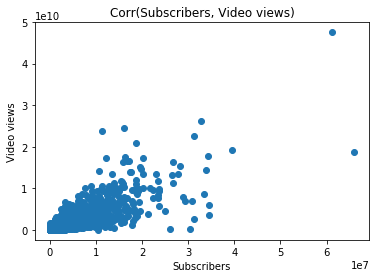

In [22]:
# Datos
x = df_yt['Subscribers'] 
y = df_yt['Video views']

fig, ax = plt.subplots()

ax.scatter(x=df_yt['Subscribers'], y=df_yt['Video views'])
plt.xlabel('Subscribers')
plt.ylabel('Video views')
plt.title('Corr(Subscribers, Video views)')

# Salvamos la imagen
fig.savefig('outputs/scatter.png')

# Mostramos la imagen en el jupyter notebook
plt.show()

### Histograma

In [23]:
# https://matplotlib.org/examples/statistics/histogram_demo_multihist.html

# Histograma
df_yt.head(15)

,Grade,Channel name,Video Uploads,Subscribers,Video views,Numeric Grade
0,A++,Zee TV,82757.0,18752951.0,20869786591,24
1,A++,T-Series,12661.0,61196302.0,47548839843,24
2,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082,24
3,A++,SET India,27323.0,31180559.0,22675948293,24
4,A++,WWE,36756.0,32852346.0,26273668433,24
5,A++,Movieclips,30243.0,17149705.0,16618094724,24
6,A++,netd müzik,8500.0,11373567.0,23898730764,24
7,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850,24
8,A++,Ryan ToysReview,1140.0,16082927.0,24518098041,24
9,A++,Zee Marathi,74607.0,2841811.0,2591830307,24


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61c4034978>,
      dtype=object)

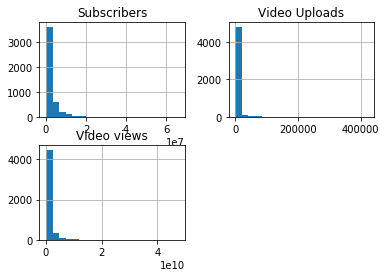

In [24]:

df_yt[['Subscribers', 'Video views', 'Video Uploads']].hist(bins=20)



In [25]:
# Salvamos el histograma en un archivo
# fig.savefig('outputs/histogram.png')
